In [1]:
df_raw = pd.read_csv('../train.csv')
df_raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
col_names = df_raw.columns
col_names

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3]:
intcolum_name=[1, 3, 4, 17, 18, 19, 20, 26, 34, 36, 37, 38, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 56,
  59, 61, 62, 66, 67, 68, 69, 70, 71, 75, 76, 77, 80]  ## 데이터가 숫자인 컬럼번호
    
df = df_raw.iloc[:, intcolum_name]
df.tail()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125
1459,20,75.0,9937,5,6,1965,1965,0.0,830,290,...,736,68,0,0,0,0,0,6,2008,147500


In [4]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

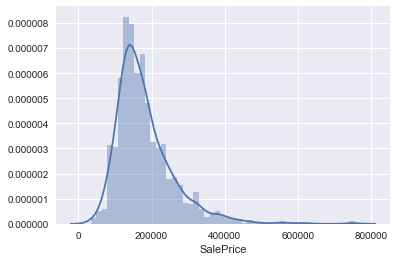

In [5]:
sns.distplot(df['SalePrice']) ## SalePrice의 데이터 분포 시각화1

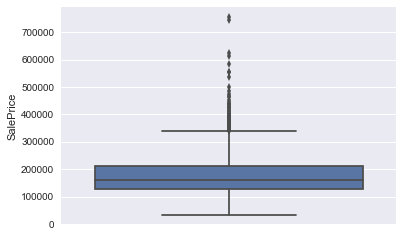

In [6]:
%matplotlib inline

sns.boxplot(y="SalePrice", data=df) ## SalePrice의 데이터 분포 시각화2
plt.show()

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
def IQEcheck(col):            ## IQE를 계산 및 box플롯의 정보
    q1 =col.quantile(q=0.25)
    q3 =col.quantile(q=0.75)
    iqr = q3 -q1
    upper = q3 + 1.5*iqr      ## upper 이상은 outlier
    lower = q1 - 1.5*iqr    
    print('median : ',col.median())   
    print('Q1 :',q1)    
    print('Q3 :',q3)
    print('upper :',upper)

IQEcheck(df['SalePrice'])

median :  163000.0
Q1 : 129975.0
Q3 : 214000.0
upper : 340037.5


MSSubClass
median :  50.0
Q1 : 20.0
Q3 : 70.0
upper : 145.0


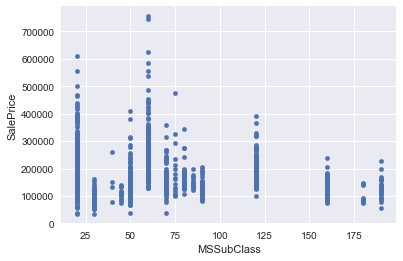

LotFrontage
median :  69.0
Q1 : 59.0
Q3 : 80.0
upper : 111.5


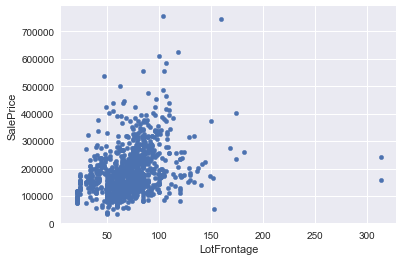

LotArea
median :  9478.5
Q1 : 7553.5
Q3 : 11601.5
upper : 17673.5


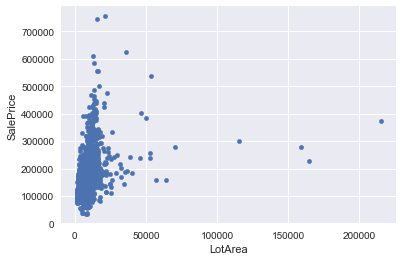

OverallQual
median :  6.0
Q1 : 5.0
Q3 : 7.0
upper : 10.0


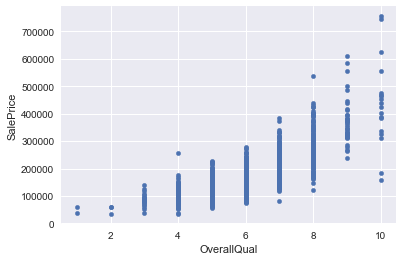

OverallCond
median :  5.0
Q1 : 5.0
Q3 : 6.0
upper : 7.5


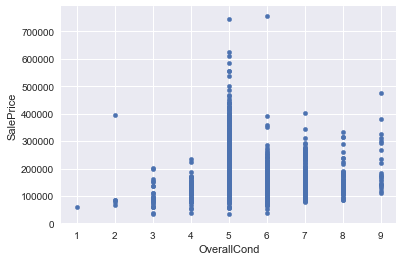

YearBuilt
median :  1973.0
Q1 : 1954.0
Q3 : 2000.0
upper : 2069.0


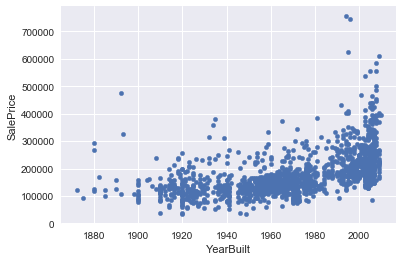

YearRemodAdd
median :  1994.0
Q1 : 1967.0
Q3 : 2004.0
upper : 2059.5


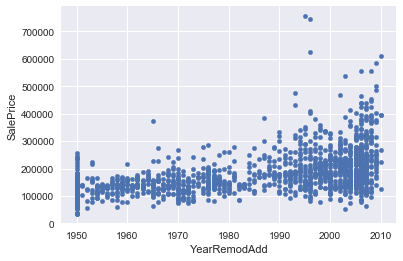

MasVnrArea
median :  0.0
Q1 : 0.0
Q3 : 166.0
upper : 415.0


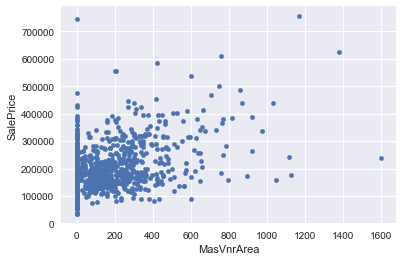

BsmtFinSF1
median :  383.5
Q1 : 0.0
Q3 : 712.25
upper : 1780.625


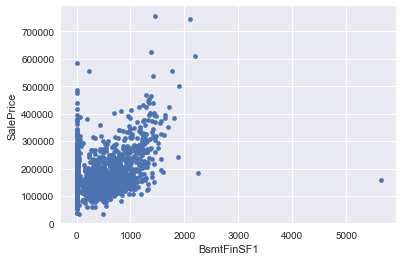

BsmtFinSF2
median :  0.0
Q1 : 0.0
Q3 : 0.0
upper : 0.0


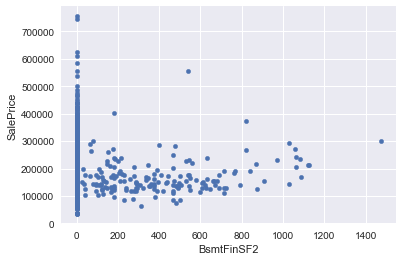

BsmtUnfSF
median :  477.5
Q1 : 223.0
Q3 : 808.0
upper : 1685.5


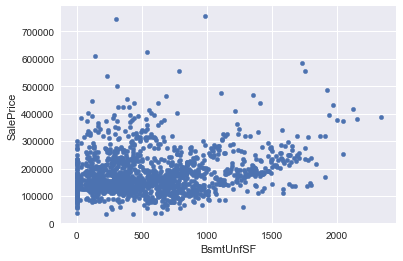

TotalBsmtSF
median :  991.5
Q1 : 795.75
Q3 : 1298.25
upper : 2052.0


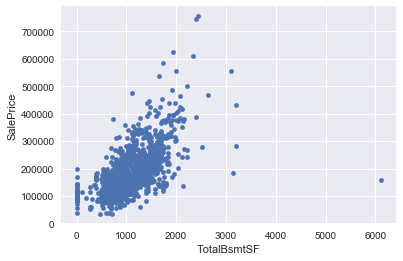

1stFlrSF
median :  1087.0
Q1 : 882.0
Q3 : 1391.25
upper : 2155.125


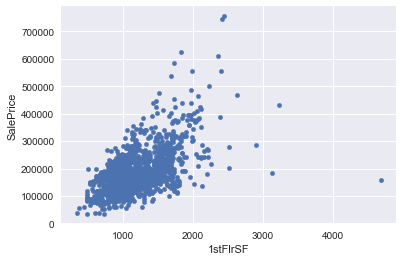

2ndFlrSF
median :  0.0
Q1 : 0.0
Q3 : 728.0
upper : 1820.0


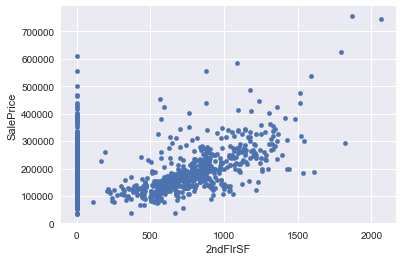

LowQualFinSF
median :  0.0
Q1 : 0.0
Q3 : 0.0
upper : 0.0


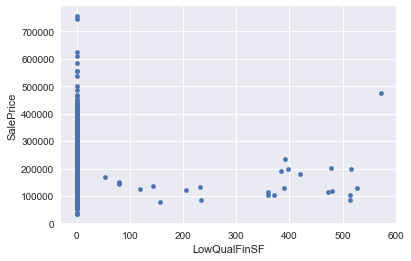

GrLivArea
median :  1464.0
Q1 : 1129.5
Q3 : 1776.75
upper : 2747.625


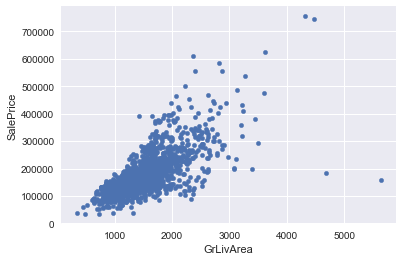

BsmtFullBath
median :  0.0
Q1 : 0.0
Q3 : 1.0
upper : 2.5


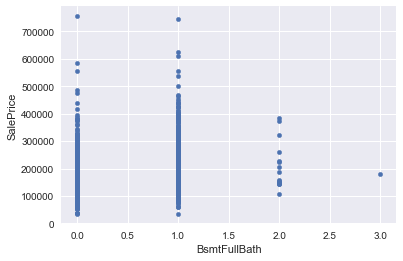

BsmtHalfBath
median :  0.0
Q1 : 0.0
Q3 : 0.0
upper : 0.0


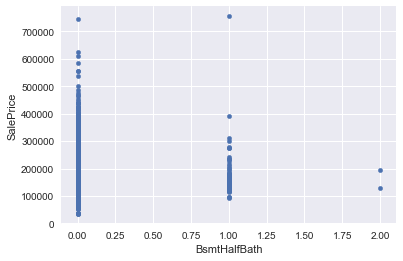

FullBath
median :  2.0
Q1 : 1.0
Q3 : 2.0
upper : 3.5


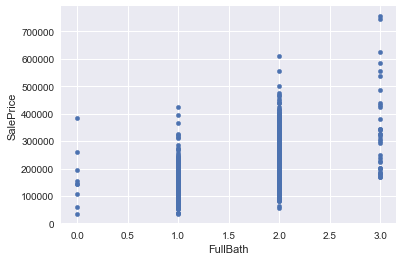

HalfBath
median :  0.0
Q1 : 0.0
Q3 : 1.0
upper : 2.5


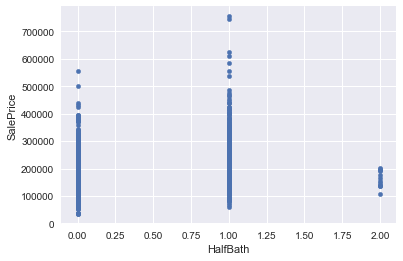

BedroomAbvGr
median :  3.0
Q1 : 2.0
Q3 : 3.0
upper : 4.5


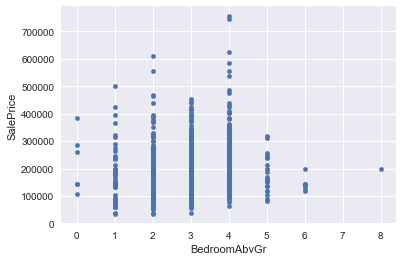

KitchenAbvGr
median :  1.0
Q1 : 1.0
Q3 : 1.0
upper : 1.0


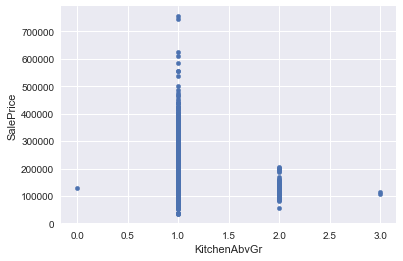

TotRmsAbvGrd
median :  6.0
Q1 : 5.0
Q3 : 7.0
upper : 10.0


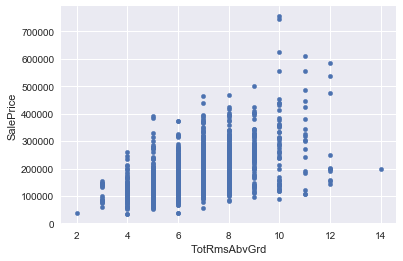

Fireplaces
median :  1.0
Q1 : 0.0
Q3 : 1.0
upper : 2.5


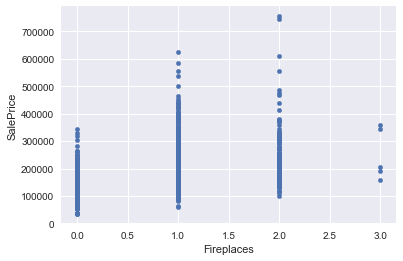

GarageYrBlt
median :  1980.0
Q1 : 1961.0
Q3 : 2002.0
upper : 2063.5


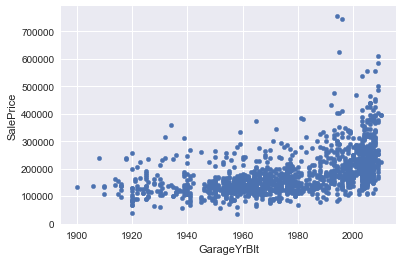

GarageCars
median :  2.0
Q1 : 1.0
Q3 : 2.0
upper : 3.5


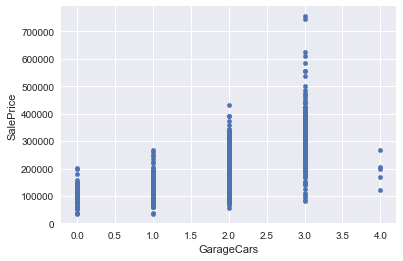

GarageArea
median :  480.0
Q1 : 334.5
Q3 : 576.0
upper : 938.25


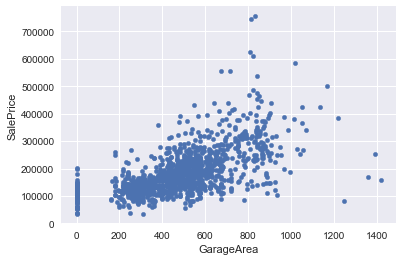

WoodDeckSF
median :  0.0
Q1 : 0.0
Q3 : 168.0
upper : 420.0


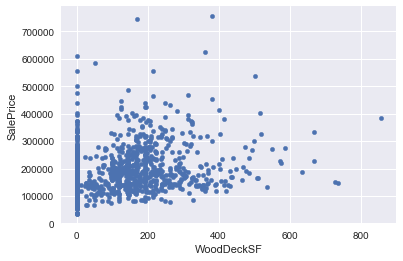

OpenPorchSF
median :  25.0
Q1 : 0.0
Q3 : 68.0
upper : 170.0


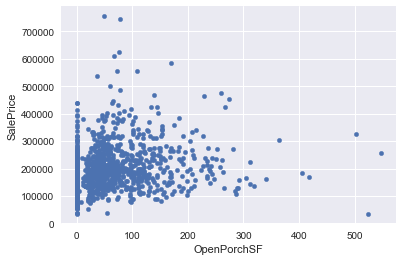

EnclosedPorch
median :  0.0
Q1 : 0.0
Q3 : 0.0
upper : 0.0


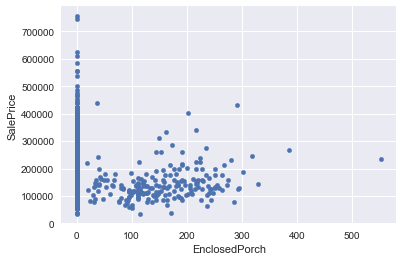

3SsnPorch
median :  0.0
Q1 : 0.0
Q3 : 0.0
upper : 0.0


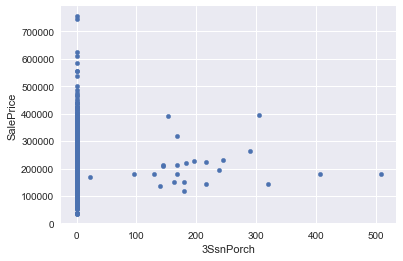

ScreenPorch
median :  0.0
Q1 : 0.0
Q3 : 0.0
upper : 0.0


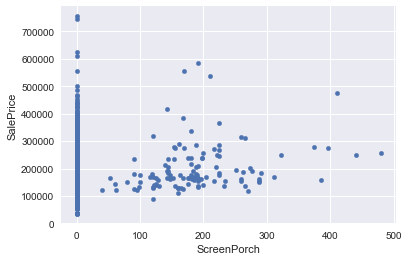

PoolArea
median :  0.0
Q1 : 0.0
Q3 : 0.0
upper : 0.0


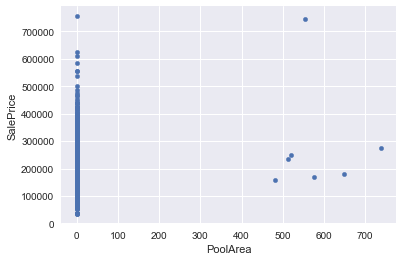

MiscVal
median :  0.0
Q1 : 0.0
Q3 : 0.0
upper : 0.0


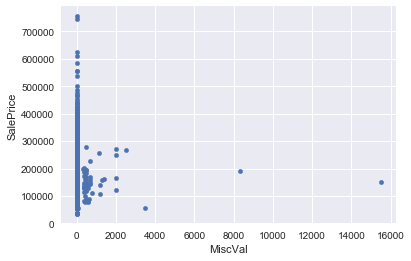

MoSold
median :  6.0
Q1 : 5.0
Q3 : 8.0
upper : 12.5


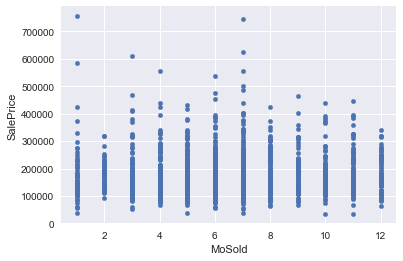

YrSold
median :  2008.0
Q1 : 2007.0
Q3 : 2009.0
upper : 2012.0


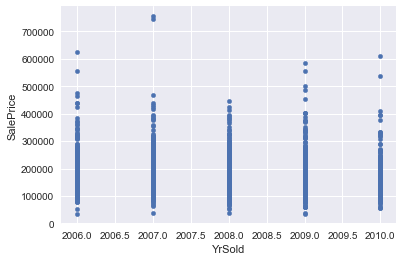

In [8]:
def show_plot1(df):
    col_names = df.columns[0:-1]
    for col_name in col_names:
        print(col_name)
        var = col_name
        data = pd.concat([df['SalePrice'], df[var]], axis=1)
        data.plot.scatter(x=var, y='SalePrice')
        IQEcheck(df[col_name])
        plt.show()
show_plot1(df)  ##전체 숫자 데이터 시각화

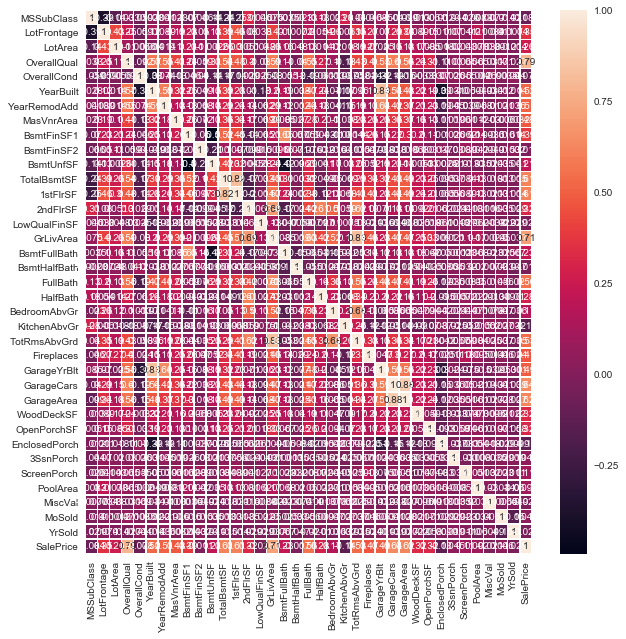

In [9]:
df_1 = df.iloc[:]
heat= df_1.corr()
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(heat.iloc[:, :], annot=True, linewidths=.5, ax=ax)


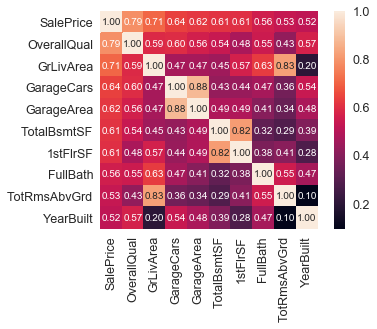

In [10]:
k = 10
cols = heat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [36]:
heat_colname = heat["SalePrice"].sort_values(ascending=False)
heat_colname = heat_colname.index
heat_colname10 = heat_colname[0:11]
heat_colname10


Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

In [59]:
test_df = df_raw[heat_colname10]
test_int = test_df.iloc[:,1:]
test_int['SalePrice'] = df_raw['SalePrice']
test_int.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1710,2,548,856,856,2,8,2003,2003,208500
1,6,1262,2,460,1262,1262,2,6,1976,1976,181500
2,7,1786,2,608,920,920,2,6,2001,2002,223500
3,7,1717,3,642,756,961,1,7,1915,1970,140000
4,8,2198,3,836,1145,1145,2,9,2000,2000,250000


In [60]:
test_int.to_csv('test_int.csv', index = False)

 # 사용할만한 column
- OverallQual

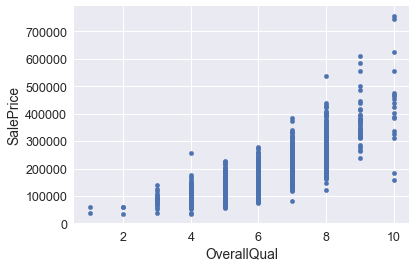

In [11]:
var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

 - GrLivArea

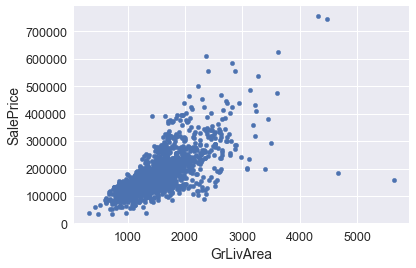

In [12]:
var = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

- GarageCars

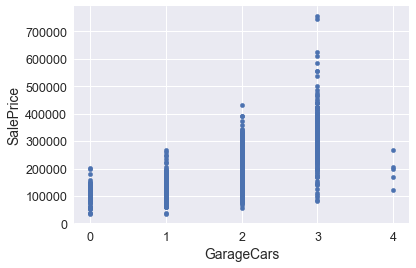

In [13]:
var = 'GarageCars'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

- GarageArea 

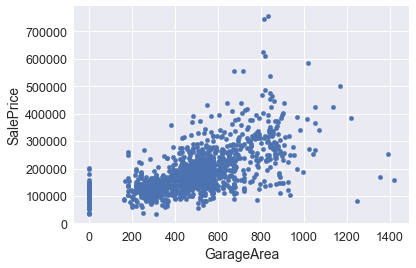

In [14]:
var = 'GarageArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

- TotalBsmtSF

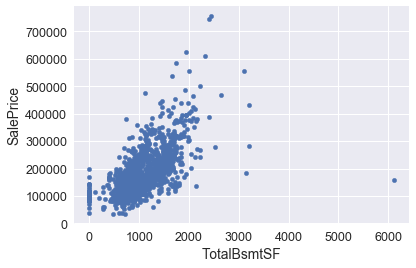

In [15]:
var = 'TotalBsmtSF'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

- 1stFlrSF       

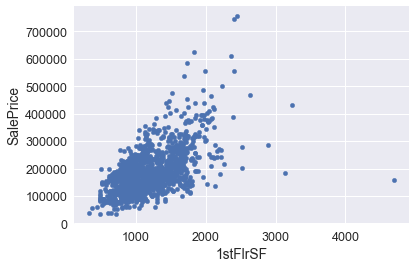

In [16]:
var = '1stFlrSF'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

- FullBath 

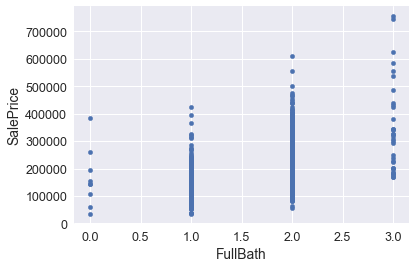

In [17]:
var = 'FullBath'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

- TotRmsAbvGrd 

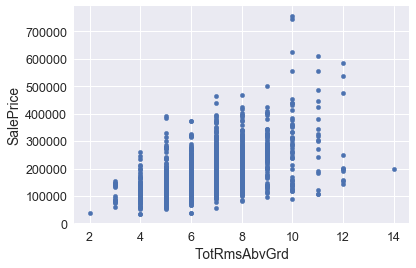

In [18]:
var = 'TotRmsAbvGrd'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

- YearBuilt

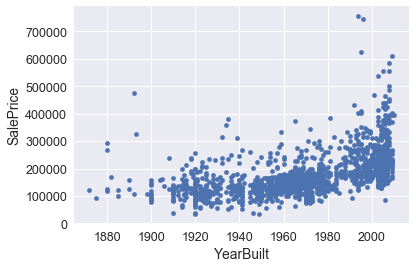

In [19]:
var = 'YearBuilt'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

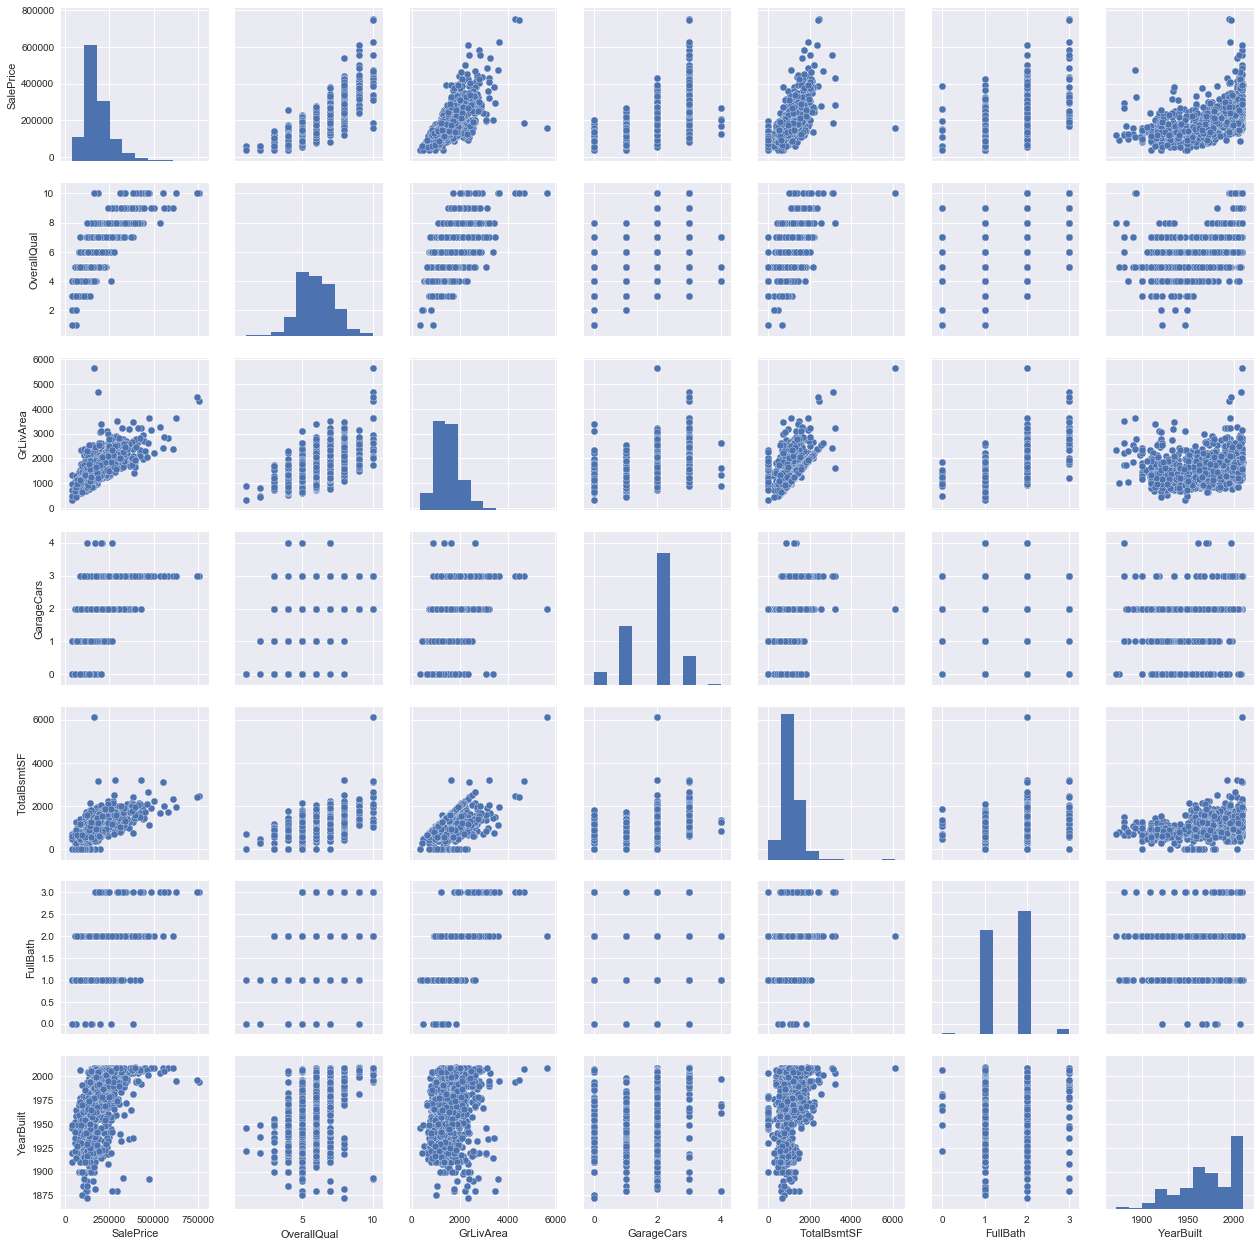

In [20]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show();

In [21]:
cols

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'TotalBsmtSF',
 'FullBath',
 'YearBuilt']

In [22]:
test_df = df_raw[cols]
test_df

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
0,208500,7,1710,2,856,2,2003
1,181500,6,1262,2,1262,2,1976
2,223500,7,1786,2,920,2,2001
3,140000,7,1717,3,756,1,1915
4,250000,8,2198,3,1145,2,2000
5,143000,5,1362,2,796,1,1993
6,307000,8,1694,2,1686,2,2004
7,200000,7,2090,2,1107,2,1973
8,129900,7,1774,2,952,2,1931
9,118000,5,1077,1,991,1,1939
